## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/final_eda_output.csv')

#### Show Top 5 Records

In [4]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['energy_production'],axis=1)

In [6]:
X.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00


In [7]:
y = df['energy_production']

In [8]:
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9522    457.32
9523    446.92
9524    429.34
9525    421.57
9526    454.41
Name: energy_production, Length: 9527, dtype: float64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(9527, 4)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7621, 4), (1906, 4))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.5556
- Mean Absolute Error: 3.6207
- R2 Score: 0.9284
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.5690
- Mean Absolute Error: 3.6445
- R2 Score: 0.9283


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.0205
- Mean Absolute Error: 4.0136
- R2 Score: 0.9131
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0401
- Mean Absolute Error: 4.0091
- R2 Score: 0.9128


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.5556
- Mean Absolute Error: 3.6209
- R2 Score: 0.9284
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.5690
- Mean Absolute Error: 3.6446
- R2 Score: 0.9283


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0417
- Mean Absolute Error: 2.1910
- R2 Score: 0.9681
-----------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.965375
5,Random Forest Regressor,0.961469
3,K-Neighbors Regressor,0.949274
4,Decision Tree,0.935054
2,Ridge,0.928312
0,Linear Regression,0.928312
1,Lasso,0.912765
7,AdaBoost Regressor,0.879539


## Linear Regression

In [16]:
XGB_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
XGB_model = XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.09


## Plot y_pred and y_test

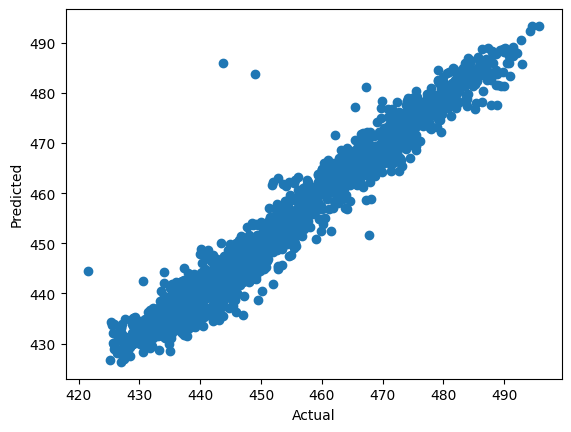

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

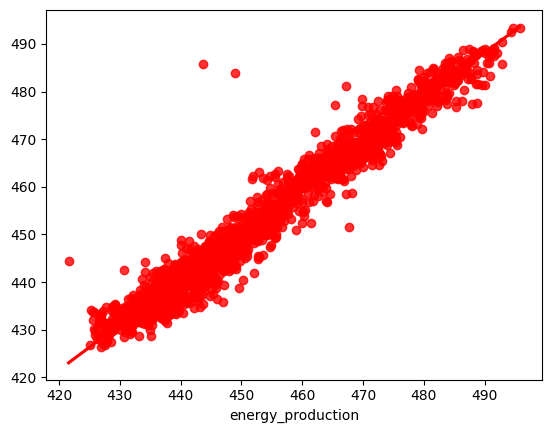

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1087,434.73,435.467834,-0.737834
6308,444.74,448.358856,-3.618856
8021,457.09,457.050659,0.039341
9483,435.39,441.852753,-6.462753
4459,441.91,442.643280,-0.733280
...,...,...,...
3400,440.53,436.687012,3.842988
4210,443.79,438.198944,5.591056
7065,480.53,479.495850,1.034150
2213,436.16,438.845428,-2.685428
